In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
# Daily temperatures 
temperatures = np.array([15, 17, 16, 14, 18, 20, 19, 15, 21, 22])
print("Original Temperatures:", temperatures)


Original Temperatures: [15 17 16 14 18 20 19 15 21 22]


In [4]:
# Calculate mean and standard deviation
mean = np.mean(temperatures)
std = np.std(temperatures)

# Standardize (Z-score)
scaled_data = (temperatures - mean) / std

print("Mean:", mean)
print("Standard Deviation:", std)
print("Scaled Data (Z-scores):", scaled_data)


Mean: 17.7
Standard Deviation: 2.6095976701399777
Scaled Data (Z-scores): [-1.03464225 -0.26824058 -0.65144142 -1.41784308  0.11496025  0.88136192
  0.49816108 -1.03464225  1.26456275  1.64776358]


In [6]:
# One-sample K-S test against the standard normal distribution
ks_statistic, p_value = stats.kstest(scaled_data, 'norm')


In [7]:
print("K-S Test Statistic:", ks_statistic)
print("P-value:", p_value)


K-S Test Statistic: 0.14958199200873884
P-value: 0.9549729651945877


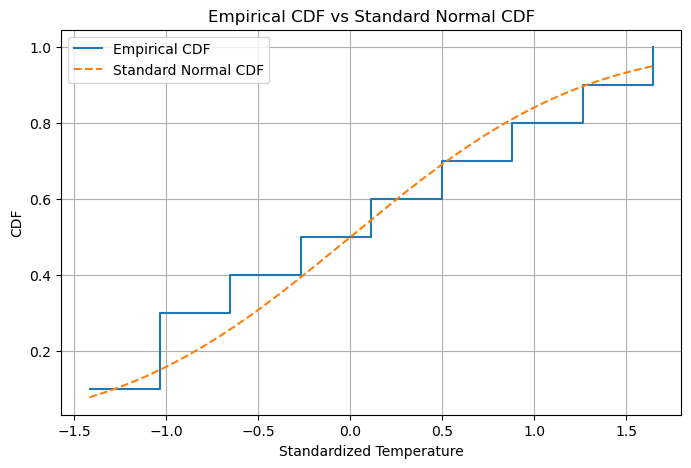

In [8]:
# Sort data for empirical CDF
sorted_data = np.sort(scaled_data)
empirical_cdf = np.arange(1, len(scaled_data)+1) / len(scaled_data)

# Plot
plt.figure(figsize=(8, 5))
plt.step(sorted_data, empirical_cdf, label='Empirical CDF', where='post')

# Standard normal CDF
x = np.linspace(min(sorted_data), max(sorted_data), 1000)
plt.plot(x, stats.norm.cdf(x), label='Standard Normal CDF', linestyle='--')

plt.xlabel('Standardized Temperature')
plt.ylabel('CDF')
plt.title('Empirical CDF vs Standard Normal CDF')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Significance level
alpha = 0.05

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("The temperatures do NOT come from a standard normal distribution.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("The temperatures may come from a standard normal distribution.")


Conclusion: Fail to reject the null hypothesis.
The temperatures may come from a standard normal distribution.
